In [1]:
from experiment import Experiment
import torch
%matplotlib inline

In [2]:
var_dict = dict(
    numerical_vars = ['Alcohol','Malic_acid','Ash','Alcalinity_of_ash',
                      'Magnesium','Total_phenols','Flavanoids','Nonflavanoid_phenols',
                      'Proanthocyanins','Color_intensity','Hue','OD280/OD315_of_diluted_wines',
                      'Proline'],
    class_var = 'class'
)

In [3]:
exp = Experiment('data/wine.csv', 
                 var_dict,
                 embedding_dim=4,
                 lr=1e-2,
                 weight_decay=0.0,
                 batch_size=1024,
                 n_epoch=30,
                 verbose=False,
                 n_bins_range=range(2, 21),
                 n_init_bins_list=[10,15,20])

In [4]:
exp.data.shape

(178, 14)

In [5]:
%time clustering_scores = exp.test_clustering_performance()

#Init Bin = 10
Embedding Failed to Converge..
Learned #Bin by Variables = [2, 4, 3, 2, 2, 3, 4, 2, 3, 2, 3, 3, 2]
#Init Bin = 15
Embedding Failed to Converge..
Learned #Bin by Variables = [2, 9, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 3]
#Init Bin = 20
Embedding Failed to Converge..
Learned #Bin by Variables = [2, 2, 2, 2, 2, 2, 3, 2, 2, 12, 3, 3, 2]
CPU times: user 7min 58s, sys: 43.9 s, total: 8min 41s
Wall time: 2min 4s


In [6]:
exp.print_clustering_scores(clustering_scores, method='dummy_only')

kmeans, #Cols = 13, NMI = 0.4288
agglomerative, #Cols = 13, NMI = 0.4161


In [7]:
exp.print_clustering_scores(clustering_scores, method='scale_numeric')

kmeans, #Cols = 13, NMI = 0.8759
agglomerative, #Cols = 13, NMI = 0.7865


In [8]:
exp.print_clustering_scores(clustering_scores, method='equal_width')

kmeans
#Bins = 2, #Cols = 26, #NMI = 0.5555
#Bins = 3, #Cols = 39, #NMI = 0.6464
#Bins = 4, #Cols = 52, #NMI = 0.7319
#Bins = 5, #Cols = 65, #NMI = 0.7915
#Bins = 6, #Cols = 78, #NMI = 0.7812
#Bins = 7, #Cols = 91, #NMI = 0.8205
#Bins = 8, #Cols = 104, #NMI = 0.7872
#Bins = 9, #Cols = 117, #NMI = 0.8507
#Bins = 10, #Cols = 130, #NMI = 0.7573
#Bins = 11, #Cols = 143, #NMI = 0.7774
#Bins = 12, #Cols = 156, #NMI = 0.7641
#Bins = 13, #Cols = 169, #NMI = 0.7589
#Bins = 14, #Cols = 182, #NMI = 0.7782
#Bins = 15, #Cols = 195, #NMI = 0.8507
#Bins = 16, #Cols = 208, #NMI = 0.7519
#Bins = 17, #Cols = 221, #NMI = 0.8561
#Bins = 18, #Cols = 234, #NMI = 0.7717
#Bins = 19, #Cols = 247, #NMI = 0.8187
#Bins = 20, #Cols = 260, #NMI = 0.7358
agglomerative
#Bins = 2, #Cols = 26, #NMI = 0.5865
#Bins = 3, #Cols = 39, #NMI = 0.7459
#Bins = 4, #Cols = 52, #NMI = 0.7172
#Bins = 5, #Cols = 65, #NMI = 0.8259
#Bins = 6, #Cols = 78, #NMI = 0.7373
#Bins = 7, #Cols = 91, #NMI = 0.8222
#Bins = 8, #Cols = 104, #NMI =

In [9]:
exp.print_clustering_scores(clustering_scores, method='equal_freq')

kmeans
#Bins = 2, #Cols = 26, #NMI = 0.7021
#Bins = 3, #Cols = 39, #NMI = 0.7944
#Bins = 4, #Cols = 52, #NMI = 0.9011
#Bins = 5, #Cols = 65, #NMI = 0.8316
#Bins = 6, #Cols = 78, #NMI = 0.8610
#Bins = 7, #Cols = 91, #NMI = 0.8473
#Bins = 8, #Cols = 104, #NMI = 0.8330
#Bins = 9, #Cols = 117, #NMI = 0.8363
#Bins = 10, #Cols = 130, #NMI = 0.8615
#Bins = 11, #Cols = 143, #NMI = 0.7838
#Bins = 12, #Cols = 156, #NMI = 0.8507
#Bins = 13, #Cols = 169, #NMI = 0.7093
#Bins = 14, #Cols = 182, #NMI = 0.7966
#Bins = 15, #Cols = 195, #NMI = 0.7576
#Bins = 16, #Cols = 208, #NMI = 0.8139
#Bins = 17, #Cols = 221, #NMI = 0.7515
#Bins = 18, #Cols = 232, #NMI = 0.7745
#Bins = 19, #Cols = 247, #NMI = 0.5782
#Bins = 20, #Cols = 256, #NMI = 0.7136
agglomerative
#Bins = 2, #Cols = 26, #NMI = 0.6716
#Bins = 3, #Cols = 39, #NMI = 0.7282
#Bins = 4, #Cols = 52, #NMI = 0.6903
#Bins = 5, #Cols = 65, #NMI = 0.7362
#Bins = 6, #Cols = 78, #NMI = 0.7067
#Bins = 7, #Cols = 91, #NMI = 0.8630
#Bins = 8, #Cols = 104, #NMI =

In [10]:
exp.print_clustering_scores(clustering_scores, method='semantic_binning')

kmeans
#Init Bins = 10, #Cols = 35, NMI = 0.7732
#Init Bins = 15, #Cols = 36, NMI = 0.7512
#Init Bins = 20, #Cols = 39, NMI = 0.7258
agglomerative
#Init Bins = 10, #Cols = 35, NMI = 0.6607
#Init Bins = 15, #Cols = 36, NMI = 0.8031
#Init Bins = 20, #Cols = 39, NMI = 0.7635


In [11]:
%time clf_scores = exp.test_classification_performance(cv=3)

#Init Bin = 10
Embedding Failed to Converge..
Learned #Bin by Variables = [4, 3, 8, 6, 2, 3, 2, 2, 2, 6, 6, 3, 8]
#Init Bin = 15
Embedding Failed to Converge..
Learned #Bin by Variables = [8, 2, 14, 2, 2, 2, 2, 6, 2, 2, 2, 2, 3]
#Init Bin = 20
Embedding Failed to Converge..
Learned #Bin by Variables = [2, 17, 2, 2, 2, 2, 2, 2, 2, 2, 3, 15, 3]
#Init Bin = 10
Embedding Failed to Converge..
Learned #Bin by Variables = [2, 3, 5, 2, 2, 3, 4, 2, 2, 2, 2, 6, 3]
#Init Bin = 15
Embedding Failed to Converge..
Learned #Bin by Variables = [2, 12, 4, 2, 2, 2, 2, 2, 2, 6, 2, 2, 3]
#Init Bin = 20
Embedding Failed to Converge..
Learned #Bin by Variables = [2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 19, 2]
#Init Bin = 10
Embedding Failed to Converge..
Learned #Bin by Variables = [2, 3, 2, 4, 5, 4, 4, 4, 2, 2, 4, 3, 2]
#Init Bin = 15
Embedding Failed to Converge..
Learned #Bin by Variables = [10, 10, 2, 2, 14, 2, 8, 2, 2, 11, 3, 2, 3]
#Init Bin = 20
Embedding Failed to Converge..
Learned #Bin by Variables = [2, 3

In [12]:
exp.print_classification_scores(clf_scores, method='dummy_only')

DT performance
#cols = 13.0, Accuracy = 0.888 (+/- 0.033)
LR performance
#cols = 13.0, Accuracy = 0.949 (+/- 0.083)


In [13]:
exp.print_classification_scores(clf_scores, method='scale_numeric')

DT performance
#cols = 13.0, Accuracy = 0.888 (+/- 0.033)
LR performance
#cols = 13.0, Accuracy = 0.989 (+/- 0.016)


In [14]:
exp.print_classification_scores(clf_scores, method='equal_width')

DT performance
#Bins = 2, #Avg Cols = 26.0, Accuracy = 0.848 (+/- 0.025)
#Bins = 3, #Avg Cols = 39.0, Accuracy = 0.888 (+/- 0.041)
#Bins = 4, #Avg Cols = 52.0, Accuracy = 0.910 (+/- 0.068)
#Bins = 5, #Avg Cols = 65.0, Accuracy = 0.910 (+/- 0.043)
#Bins = 6, #Avg Cols = 78.0, Accuracy = 0.876 (+/- 0.057)
#Bins = 7, #Avg Cols = 91.0, Accuracy = 0.848 (+/- 0.097)
#Bins = 8, #Avg Cols = 104.0, Accuracy = 0.854 (+/- 0.082)
#Bins = 9, #Avg Cols = 117.0, Accuracy = 0.876 (+/- 0.017)
#Bins = 10, #Avg Cols = 130.0, Accuracy = 0.854 (+/- 0.081)
#Bins = 11, #Avg Cols = 143.0, Accuracy = 0.894 (+/- 0.086)
#Bins = 12, #Avg Cols = 156.0, Accuracy = 0.848 (+/- 0.053)
#Bins = 13, #Avg Cols = 169.0, Accuracy = 0.815 (+/- 0.123)
#Bins = 14, #Avg Cols = 182.0, Accuracy = 0.843 (+/- 0.031)
#Bins = 15, #Avg Cols = 195.0, Accuracy = 0.848 (+/- 0.074)
#Bins = 16, #Avg Cols = 208.0, Accuracy = 0.893 (+/- 0.040)
#Bins = 17, #Avg Cols = 221.0, Accuracy = 0.792 (+/- 0.060)
#Bins = 18, #Avg Cols = 234.0, Accuracy

In [15]:
exp.print_classification_scores(clf_scores, method='equal_freq')

DT performance
#Bins = 2, #Avg Cols = 26.0, Accuracy = 0.888 (+/- 0.041)
#Bins = 3, #Avg Cols = 39.0, Accuracy = 0.910 (+/- 0.056)
#Bins = 4, #Avg Cols = 52.0, Accuracy = 0.831 (+/- 0.147)
#Bins = 5, #Avg Cols = 65.0, Accuracy = 0.888 (+/- 0.082)
#Bins = 6, #Avg Cols = 78.0, Accuracy = 0.854 (+/- 0.077)
#Bins = 7, #Avg Cols = 91.0, Accuracy = 0.910 (+/- 0.014)
#Bins = 8, #Avg Cols = 104.0, Accuracy = 0.854 (+/- 0.044)
#Bins = 9, #Avg Cols = 117.0, Accuracy = 0.815 (+/- 0.083)
#Bins = 10, #Avg Cols = 130.0, Accuracy = 0.843 (+/- 0.170)
#Bins = 11, #Avg Cols = 143.0, Accuracy = 0.882 (+/- 0.084)
#Bins = 12, #Avg Cols = 156.0, Accuracy = 0.803 (+/- 0.158)
#Bins = 13, #Avg Cols = 169.0, Accuracy = 0.843 (+/- 0.112)
#Bins = 14, #Avg Cols = 181.66666666666666, Accuracy = 0.815 (+/- 0.072)
#Bins = 15, #Avg Cols = 195.0, Accuracy = 0.792 (+/- 0.126)
#Bins = 16, #Avg Cols = 207.66666666666666, Accuracy = 0.787 (+/- 0.094)
#Bins = 17, #Avg Cols = 220.0, Accuracy = 0.877 (+/- 0.103)
#Bins = 18, #

In [16]:
exp.print_classification_scores(clf_scores, method='semantic_binning')

DT performance
#Init Bins = 10, #Avg Cols = 44.666666666666664, Accuracy = 0.899 (+/- 0.002)
#Init Bins = 15, #Avg Cols = 54.333333333333336, Accuracy = 0.854 (+/- 0.088)
#Init Bins = 20, #Avg Cols = 50.333333333333336, Accuracy = 0.882 (+/- 0.029)
LR performance
#Init Bins = 10, #Avg Cols = 44.666666666666664, Accuracy = 0.972 (+/- 0.016)
#Init Bins = 15, #Avg Cols = 54.333333333333336, Accuracy = 0.933 (+/- 0.028)
#Init Bins = 20, #Avg Cols = 50.333333333333336, Accuracy = 0.955 (+/- 0.016)
NB performance
#Init Bins = 10, #Avg Cols = 44.666666666666664, Accuracy = 0.950 (+/- 0.027)
#Init Bins = 15, #Avg Cols = 54.333333333333336, Accuracy = 0.927 (+/- 0.015)
#Init Bins = 20, #Avg Cols = 50.333333333333336, Accuracy = 0.961 (+/- 0.042)


In [4]:
exp.data.shape

(178, 14)

In [4]:
from data_handler import DataHandler
handler = DataHandler(exp.data, exp.var_dict)
from semantic_binning import SemanticBinning
sb = SemanticBinning(handler.var_dict, embedding_dim=8, batch_size=1024, 
                     n_epoch=100, lr=1e-2, weight_decay=0.0, verbose=True)
sb.fit(exp.data, n_init_bins=7)

>>> Epoch = 1, Loss = 0.3954528272151947
[5, 6, 2, 5, 6, 6, 5, 5, 5, 6, 5, 6, 6] 0.207567146136
>>> Epoch = 2, Loss = 0.38741281628608704
[3, 2, 6, 3, 2, 3, 4, 2, 6, 2, 2, 2, 4] 0.419167999823
>>> Epoch = 3, Loss = 0.3825528025627136
[2, 3, 2, 4, 2, 3, 3, 2, 2, 2, 2, 6, 3] 0.705626162348
>>> Epoch = 4, Loss = 0.37796828150749207
[2, 2, 2, 3, 2, 3, 3, 2, 2, 2, 2, 4, 2] 0.755858280275
>>> Epoch = 5, Loss = 0.38001948595046997
[2, 2, 6, 3, 3, 2, 3, 2, 3, 2, 2, 2, 2] 0.756143457781
>>> Epoch = 6, Loss = 0.3699863851070404
[2, 2, 6, 4, 3, 2, 3, 2, 3, 2, 2, 2, 2] 0.744547480466
>>> Epoch = 7, Loss = 0.37408486008644104
[3, 2, 6, 4, 3, 2, 3, 2, 2, 2, 2, 2, 2] 0.73194815864
>>> Epoch = 8, Loss = 0.3810977041721344
[3, 2, 6, 4, 3, 2, 3, 2, 2, 2, 2, 3, 2] 0.723838130262
>>> Epoch = 9, Loss = 0.37662452459335327
[3, 3, 6, 4, 3, 3, 4, 2, 2, 3, 2, 2, 2] 0.694371520193
>>> Epoch = 10, Loss = 0.3650525212287903
[2, 3, 2, 4, 4, 2, 3, 2, 2, 4, 2, 3, 5] 0.711484137408
>>> Epoch = 11, Loss = 0.3771058619

>>> Epoch = 86, Loss = 0.3685261011123657
[2, 3, 6, 2, 2, 3, 3, 2, 2, 3, 3, 4, 3] 0.615136818764
>>> Epoch = 87, Loss = 0.37447234988212585
[2, 3, 6, 2, 2, 3, 3, 2, 4, 3, 3, 4, 4] 0.605666096377
>>> Epoch = 88, Loss = 0.3623487055301666
[2, 3, 6, 2, 4, 3, 3, 2, 4, 3, 3, 4, 4] 0.615321709948
>>> Epoch = 89, Loss = 0.3686799108982086
[2, 3, 6, 2, 4, 3, 3, 2, 3, 3, 3, 4, 4] 0.618403692663
>>> Epoch = 90, Loss = 0.34161362051963806
[2, 4, 6, 2, 4, 3, 4, 2, 2, 3, 3, 4, 4] 0.605361884357
>>> Epoch = 91, Loss = 0.37465161085128784
[2, 3, 6, 2, 3, 3, 4, 2, 2, 3, 2, 4, 4] 0.599429357062
>>> Epoch = 92, Loss = 0.3770560622215271
[2, 3, 6, 2, 3, 3, 4, 2, 2, 3, 4, 4, 4] 0.610868665873
>>> Epoch = 93, Loss = 0.3677746653556824
[2, 3, 6, 2, 4, 3, 4, 2, 2, 3, 4, 4, 4] 0.60320479579
>>> Epoch = 94, Loss = 0.37683218717575073
[2, 5, 6, 2, 4, 3, 2, 2, 2, 3, 2, 4, 4] 0.598908881642
>>> Epoch = 95, Loss = 0.37250816822052
[2, 3, 6, 2, 2, 3, 2, 2, 2, 3, 3, 4, 4] 0.613554791439
>>> Epoch = 96, Loss = 0.3565

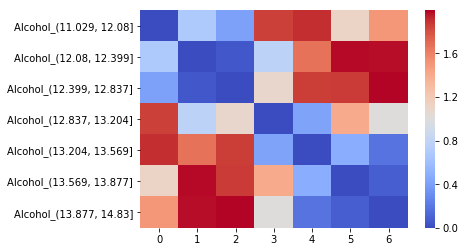

In [5]:
sb.plot_pairwise_distance_between_bins('Alcohol')

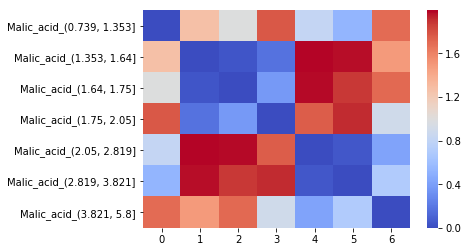

In [6]:
sb.plot_pairwise_distance_between_bins('Malic_acid')

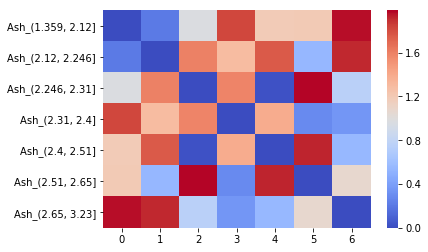

In [7]:
sb.plot_pairwise_distance_between_bins('Ash')

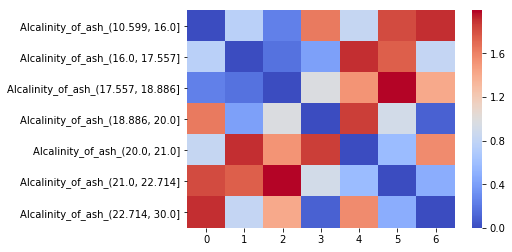

In [8]:
sb.plot_pairwise_distance_between_bins('Alcalinity_of_ash')

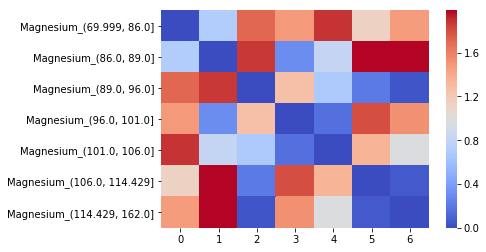

In [9]:
sb.plot_pairwise_distance_between_bins('Magnesium')

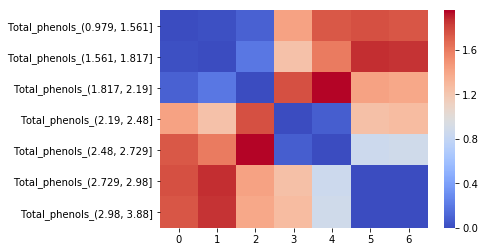

In [10]:
sb.plot_pairwise_distance_between_bins('Total_phenols')

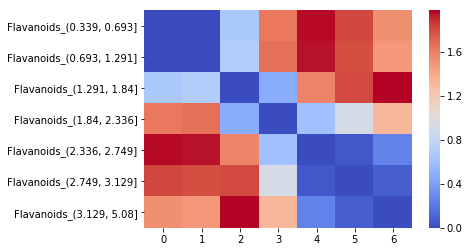

In [11]:
sb.plot_pairwise_distance_between_bins('Flavanoids')

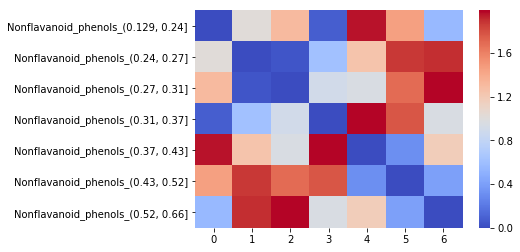

In [12]:
sb.plot_pairwise_distance_between_bins('Nonflavanoid_phenols')

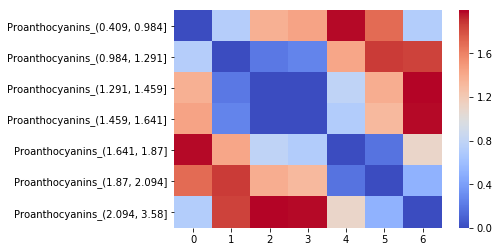

In [13]:
sb.plot_pairwise_distance_between_bins('Proanthocyanins')

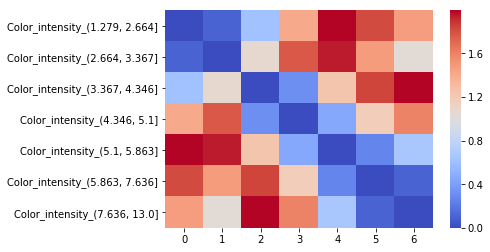

In [14]:
sb.plot_pairwise_distance_between_bins('Color_intensity')

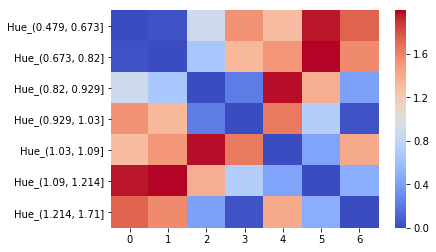

In [15]:
sb.plot_pairwise_distance_between_bins('Hue')

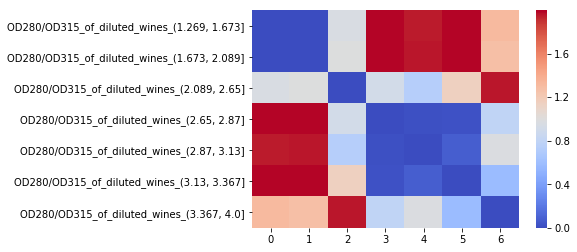

In [16]:
sb.plot_pairwise_distance_between_bins('OD280/OD315_of_diluted_wines')

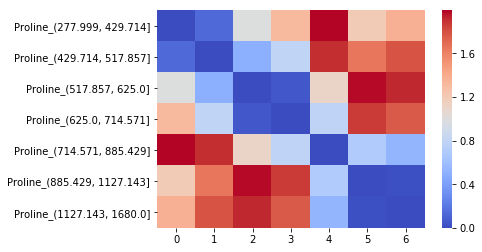

In [17]:
sb.plot_pairwise_distance_between_bins('Proline')

In [18]:
for var, bins in sb.bins_by_var.items():
    print(var)
    print(bins['bins'])

Alcohol
['(11.029, 12.837]', '(12.837, 14.83]']
Malic_acid
['(0.739, 1.353]', '(1.353, 2.05]', '(2.05, 3.821]', '(3.821, 5.8]']
Ash
['(1.359, 2.246]', '(2.246, 2.31]', '(2.31, 2.4]', '(2.4, 2.51]', '(2.51, 2.65]', '(2.65, 3.23]']
Alcalinity_of_ash
['(10.599, 20.0]', '(20.0, 30.0]']
Magnesium
['(69.999, 89.0]', '(89.0, 162.0]']
Total_phenols
['(0.979, 2.19]', '(2.19, 2.729]', '(2.729, 3.88]']
Flavanoids
['(0.339, 1.291]', '(1.291, 2.336]', '(2.336, 5.08]']
Nonflavanoid_phenols
['(0.129, 0.37]', '(0.37, 0.66]']
Proanthocyanins
['(0.409, 0.984]', '(0.984, 1.641]', '(1.641, 2.094]', '(2.094, 3.58]']
Color_intensity
['(1.279, 3.367]', '(3.367, 5.1]', '(5.1, 13.0]']
Hue
['(0.479, 0.82]', '(0.82, 1.03]', '(1.03, 1.71]']
OD280/OD315_of_diluted_wines
['(1.269, 2.089]', '(2.089, 2.65]', '(2.65, 3.367]', '(3.367, 4.0]']
Proline
['(277.999, 517.857]', '(517.857, 714.571]', '(714.571, 885.429]', '(885.429, 1680.0]']


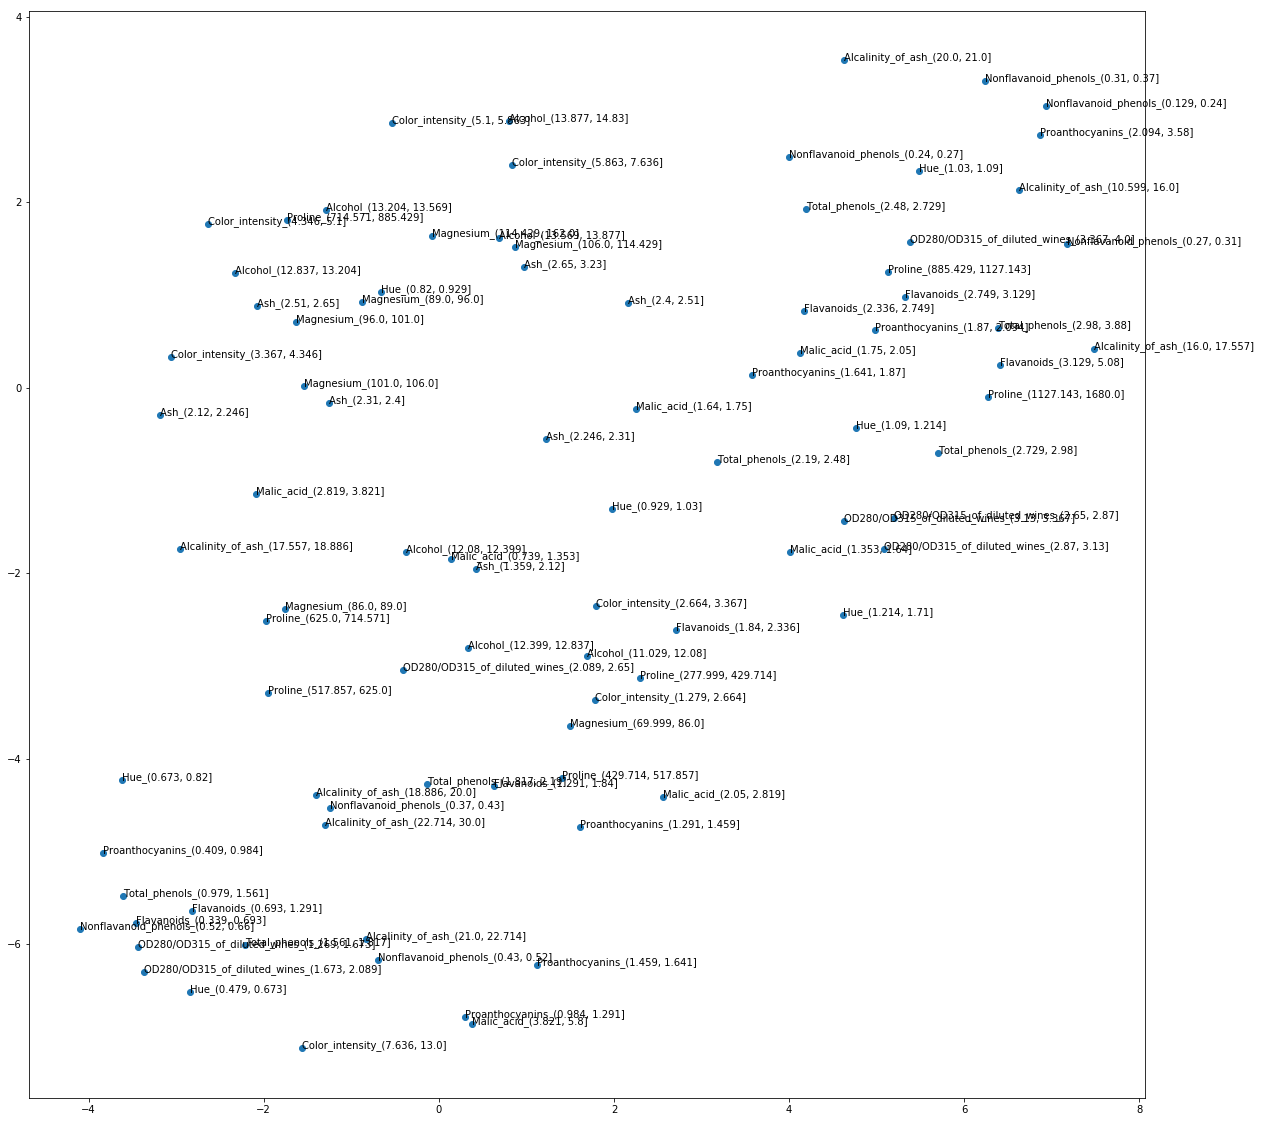

In [19]:
sb.visualize_bin_embeddings()

In [40]:
import numpy as np
import seaborn as sns
from sklearn.metrics import pairwise_distances, pairwise_kernels
from sklearn.decomposition import KernelPCA

def get_begin_point_of_bin(col):
    return float(col[len(variable):].split('_(')[-1].split(',')[0])

In [35]:
variable = 'Hue'
embedding_by_col = [(col, e) for col, e in sb.bin_embedder.embedding_by_column.items() if variable == col[:len(variable)]]
embedding_by_col = sorted(embedding_by_col, key=lambda x: get_begin_point_of_bin(x[0]))

cols = [x[0] for x in embedding_by_col]
embeddings = np.array([x[1] for x in embedding_by_col])

# De-noise embeddings
kernel_pca = KernelPCA(n_components=2, kernel='cosine')
dist_matrix = pairwise_distances(kernel_pca.fit_transform(embeddings), metric='cosine').astype(np.float64)

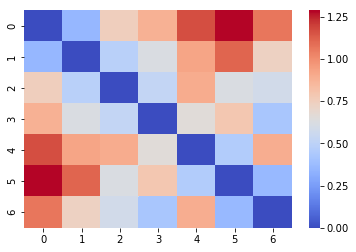

In [36]:
sns.heatmap(pairwise_distances(embeddings, metric='cosine'), cmap='coolwarm')

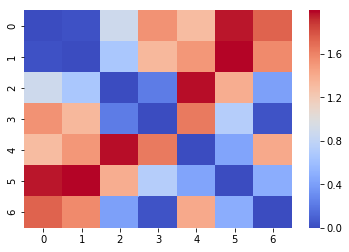

In [37]:
sns.heatmap(dist_matrix, cmap='coolwarm')

In [41]:
temp = kernel_pca.fit_transform(pairwise_kernels(embeddings, metric='cosine'))

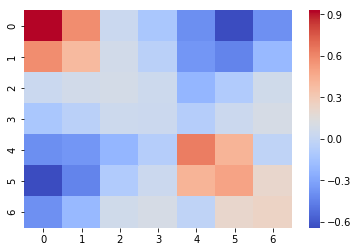

In [45]:
sns.heatmap(np.matmul(temp, temp.T), cmap='coolwarm')